<a href="https://www.kaggle.com/code/jonasheinicke/infectious-disease-prediction?scriptVersionId=185346372" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train_df = pd.read_csv("/kaggle/input/infectious-disease-prediction/train.csv")
test_df = pd.read_csv("/kaggle/input/infectious-disease-prediction/test.csv")


#train_df.isna().sum()
#test_df.isna().sum()
#train_df.info()
df = pd.concat([train_df, test_df]).drop("Unnamed: 0", axis = 1)
#df.sort_values("Rate", ascending = False).head()

In [15]:
#pd.set_option('display.max_seq_items', None)
#pd.set_option('display.max_rows', None)
disease_categories = {
    'Amebiasis': 'Parasitic Infections',
    'Anaplasmosis and Ehrlichiosis': 'Bacterial Infections',
    'Babesiosis': 'Parasitic Infections',
    'Botulism, Foodborne': 'Bacterial Infections',
    'Botulism, Other': 'Bacterial Infections',
    'Botulism, Wound': 'Bacterial Infections',
    'Brucellosis': 'Bacterial Infections',
    'Campylobacteriosis': 'Bacterial Infections',
    'Chlamydia': 'Bacterial Infections',
    'Cholera': 'Bacterial Infections',
    'Ciguatera Fish Poisoning': 'Toxin-Related Conditions',
    'Coccidioidomycosis': 'Fungal Infections',
    'Creutzfeldt-Jakob Disease and other Transmissible Spongiform Encephalopathies': 'Other',
    'Cryptosporidiosis': 'Parasitic Infections',
    'Cyclosporiasis': 'Parasitic Infections',
    'Cysticercosis or Taeniasis': 'Parasitic Infections',
    'Dengue': 'Viral Infections',
    'Diphtheria': 'Bacterial Infections',
    'E. coli O157': 'Bacterial Infections',
    'E. coli Other STEC (non-O157)': 'Bacterial Infections',
    'Early Syphilis': 'Bacterial Infections',
    'Giardiasis': 'Parasitic Infections',
    'Gonorrhea': 'Bacterial Infections',
    'HIV': 'Viral Infections',
    'Hantavirus Infection': 'Viral Infections',
    'Hemolytic Uremic Syndrome': 'Other',
    'Hepatitis A': 'Viral Infections',
    'Hepatitis B, Acute': 'Viral Infections',
    'Hepatitis C, Acute': 'Viral Infections',
    'Hepatitis E, acute infection': 'Viral Infections',
    'Influenza Death (<65 years of age)': 'Viral Infections',
    'Invasive Meningococcal Disease': 'Bacterial Infections',
    'Legionellosis': 'Bacterial Infections',
    'Leprosy': 'Bacterial Infections',
    'Leptospirosis': 'Bacterial Infections',
    'Listeriosis': 'Bacterial Infections',
    'Lyme Disease': 'Bacterial Infections',
    'Malaria': 'Parasitic Infections',
    'Measles': 'Viral Infections',
    'Mumps': 'Viral Infections',
    'Paralytic Shellfish Poisoning': 'Toxin-Related Conditions',
    'Pertussis': 'Bacterial Infections',
    'Plague, human': 'Bacterial Infections',
    'Psittacosis': 'Bacterial Infections',
    'Q Fever': 'Bacterial Infections',
    'Rabies, human': 'Viral Infections',
    'Relapsing Fever': 'Bacterial Infections',
    'Rubella': 'Viral Infections',
    'Salmonellosis': 'Bacterial Infections',
    'Scombroid Fish Poisoning': 'Toxin-Related Conditions',
    'Shiga Toxin Positive Feces (without culture confirmation)': 'Other',
    'Shigellosis': 'Bacterial Infections',
    'Spotted Fever Rickettsiosis': 'Bacterial Infections',
    'Staphylococcus aureus Infection (cases resulting in death or ICU)': 'Bacterial Infections',
    'Streptococcal Infection (cases in food and dairy workers)': 'Bacterial Infections',
    'Tetanus': 'Bacterial Infections',
    'Toxic Shock Syndrome (Non-Streptococcal)': 'Other',
    'Trichinosis': 'Parasitic Infections',
    'Tuberculosis': 'Bacterial Infections',
    'Tularemia': 'Bacterial Infections',
    'Typhoid Fever, case': 'Bacterial Infections',
    'Typhus Fever': 'Bacterial Infections',
    'Varicella Hospitalizations': 'Viral Infections',
    'Vibrio Infection (non-Cholera)': 'Bacterial Infections',
    'Yersiniosis': 'Bacterial Infections'
}
disease_symptom_mapping = {
    'Amebiasis': 'Gastrointestinal',
    'Anaplasmosis and Ehrlichiosis': 'Systemic',
    'Babesiosis': 'Systemic',
    'Botulism, Foodborne': 'Neurological',
    'Botulism, Other': 'Neurological',
    'Botulism, Wound': 'Neurological',
    'Brucellosis': 'Systemic',
    'Campylobacteriosis': 'Gastrointestinal',
    'Chlamydia': 'STD',
    'Cholera': 'Gastrointestinal',
    'Ciguatera Fish Poisoning': 'Neurological',
    'Coccidioidomycosis': 'Respiratory',
    'Creutzfeldt-Jakob Disease and other Transmissible Spongiform Encephalopathies': 'Neurological',
    'Cryptosporidiosis': 'Gastrointestinal',
    'Cyclosporiasis': 'Gastrointestinal',
    'Cysticercosis or Taeniasis': 'Neurological',
    'Dengue': 'Systemic',
    'Diphtheria': 'Respiratory',
    'E. coli O157': 'Gastrointestinal',
    'E. coli Other STEC (non-O157)': 'Gastrointestinal',
    'Early Syphilis': 'Skin/Soft Tissue',
    'Giardiasis': 'Gastrointestinal',
    'Gonorrhea': 'STD',
    'HIV': 'Systemic',
    'Hantavirus Infection': 'Respiratory',
    'Hemolytic Uremic Syndrome': 'Systemic',
    'Hepatitis A': 'Gastrointestinal',
    'Hepatitis B, Acute': 'Gastrointestinal',
    'Hepatitis C, Acute': 'Gastrointestinal',
    'Hepatitis E, acute infection': 'Gastrointestinal',
    'Influenza Death (<65 years of age)': 'Respiratory',
    'Invasive Meningococcal Disease': 'Neurological',
    'Legionellosis': 'Respiratory',
    'Leprosy': 'Skin/Soft Tissue',
    'Leptospirosis': 'Systemic',
    'Listeriosis': 'Gastrointestinal',
    'Lyme Disease': 'Skin/Soft Tissue',
    'Malaria': 'Systemic',
    'Measles': 'Skin/Soft Tissue',
    'Mumps': 'Systemic',
    'Paralytic Shellfish Poisoning': 'Neurological',
    'Pertussis': 'Respiratory',
    'Plague, human': 'Systemic',
    'Psittacosis': 'Respiratory',
    'Q Fever': 'Systemic',
    'Rabies, human': 'Neurological',
    'Relapsing Fever': 'Systemic',
    'Rubella': 'Skin/Soft Tissue',
    'Salmonellosis': 'Gastrointestinal',
    'Scombroid Fish Poisoning': 'Neurological',
    'Shiga Toxin Positive Feces (without culture confirmation)': 'Gastrointestinal',
    'Shigellosis': 'Gastrointestinal',
    'Spotted Fever Rickettsiosis': 'Skin/Soft Tissue',
    'Staphylococcus aureus Infection (cases resulting in death or ICU)': 'Skin/Soft Tissue',
    'Streptococcal Infection (cases in food and dairy workers)': 'Skin/Soft Tissue',
    'Tetanus': 'Neurological',
    'Toxic Shock Syndrome (Non-Streptococcal)': 'Systemic',
    'Trichinosis': 'Neurological',
    'Tuberculosis': 'Respiratory',
    'Tularemia': 'Systemic',
    'Typhoid Fever, case': 'Gastrointestinal',
    'Typhus Fever': 'Systemic',
    'Varicella Hospitalizations': 'Skin/Soft Tissue',
    'Vibrio Infection (non-Cholera)': 'Gastrointestinal',
    'Yersiniosis': 'Gastrointestinal'
}
disease_mapping = {
    'Botulism, Foodborne': 'Botulism',
    'Botulism, Other': 'Botulism',
    'Botulism, Wound': 'Botulism',
    'Ciguatera Fish Poisoning': 'Fish Poisoning',
    'Creutzfeldt-Jakob Disease and other Transmissible Spongiform Encephalopathies': 'Creutzfeldt-Jakob Disease',
    'E. coli O157': 'E. coli',
    'E. coli Other STEC (non-O157)': 'E. coli',
    'Early Syphilis': 'Syphilis',
    'Hantavirus Infection': 'Hantavirus',
    'Hepatitis A': 'Hepatitis',
    'Hepatitis B, Acute': 'Hepatitis',
    'Hepatitis C, Acute': 'Hepatitis',
    'Hepatitis E, acute infection': 'Hepatitis',
    'Influenza Death (<65 years of age)': 'Influenza',
    'Invasive Meningococcal Disease': 'Meningococcal Disease',
    'Paralytic Shellfish Poisoning': 'Shellfish Poisoning',
    'Plague, human': 'Plague',
    'Scombroid Fish Poisoning': 'Fish Poisoning',
    'Shiga Toxin Positive Feces (without culture confirmation)': 'Shiga Toxin Positive Feces',
    'Staphylococcus aureus Infection (cases resulting in death or ICU)': 'Staphylococcus aureus Infection',
    'Streptococcal Infection (cases in food and dairy workers)': 'Streptococcal Infection',
    'Toxic Shock Syndrome (Non-Streptococcal)': 'Toxic Shock Syndrome',
    'Varicella Hospitalizations': 'Varicella',
    'Vibrio Infection (non-Cholera)': 'Vibrio Infection'
}
# Apply the mapping to create a new column with disease categories
df['Disease_Category'] = df['Disease'].map(disease_categories)
# Apply the mapping to create a new column with disease categories
df['Symptom_Category'] = df['Disease'].map(disease_symptom_mapping)

df['Disease'] = df['Disease'].replace(disease_mapping)

In [16]:
mean_rates = df.groupby('Disease', observed= True)['Rate'].mean().reset_index()

# Filter diseases with a mean rate >= 1
filtered_diseases = mean_rates[mean_rates['Rate'] >= 1]['Disease']

original_df = df
#Filter out low rate diseases
low_df = df[~df['Disease'].isin(filtered_diseases)].dropna()
# Filter the original DataFrame to include only those diseases
df = df[df['Disease'].isin(filtered_diseases)].dropna()

In [18]:
# Convert appropriate columns to 'category'
df['Disease_Category'] = df['Disease_Category'].astype('category')
df['Symptom_Category'] = df['Symptom_Category'].astype('category')
df['Disease'] = df['Disease'].astype('category')
df['County'] = df['County'].astype('category')
df['Sex'] = df['Sex'].astype('category')

# Downcast integer columns to more memory-efficient types
df['Year'] = df['Year'].astype('int16')
df['Count'] = df['Count'].astype('int32')
df['Population'] = df['Population'].astype('int32')

# Downcast float columns to more memory-efficient types
df['CI.lower'] = df['CI.lower'].astype('int16')
df['CI.upper'] = df['CI.upper'].astype('int16')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22538 entries, 0 to 18898
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Disease           22538 non-null  category
 1   County            22538 non-null  category
 2   Year              22538 non-null  int16   
 3   Sex               22538 non-null  category
 4   Count             22538 non-null  int32   
 5   Population        22538 non-null  int32   
 6   Rate              22538 non-null  float64 
 7   CI.lower          22538 non-null  int16   
 8   CI.upper          22538 non-null  int16   
 9   Disease_Category  22538 non-null  category
 10  Symptom_Category  22538 non-null  category
dtypes: category(5), float64(1), int16(3), int32(2)
memory usage: 774.0 KB


In [29]:
df.groupby('Disease')['Rate'].mean().sort_values(ascending = False)

/tmp/ipykernel_33/4144101224.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Disease')['Rate'].mean().sort_values(ascending = False)


Disease
Chlamydia             275.354410
Gonorrhea              47.555123
Campylobacteriosis     15.823124
Salmonellosis          10.613186
Coccidioidomycosis      8.330639
Pertussis               8.325692
HIV                     6.575777
Giardiasis              5.534355
Syphilis                4.251311
Tuberculosis            4.189958
Shigellosis             2.924446
Cryptosporidiosis       1.161131
E. coli                 1.002296
Name: Rate, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


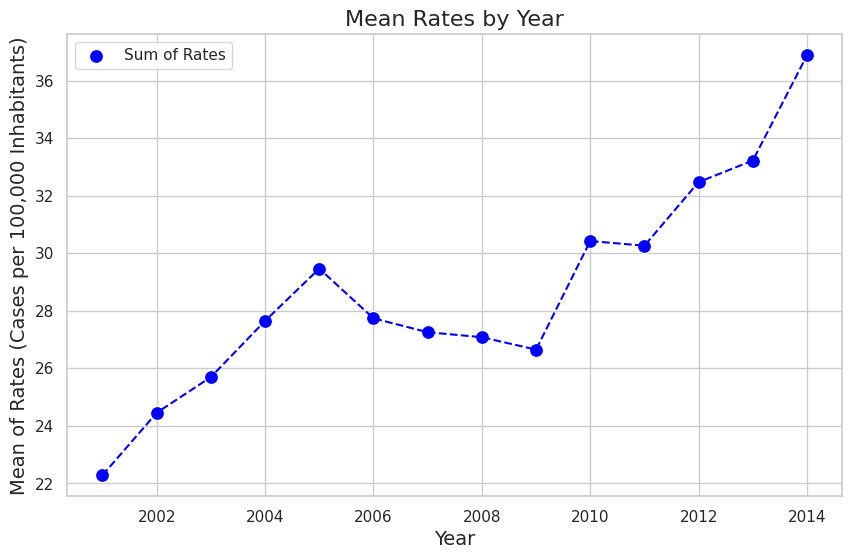

In [31]:
# Group by 'Year' and calculate the mean 'Rate'
df_Rate_Year = df.groupby('Year')['Rate'].mean().reset_index()

# Set the style
sns.set(style="whitegrid")

# Create a scatter plot with a trend line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_Rate_Year, x='Year', y='Rate', s=100, color='blue', marker='o', label='Mean of Rates')
sns.lineplot(data=df_Rate_Year, x='Year', y='Rate', color='blue', linestyle='--')

# Set the y-axis to start from 0
plt.ylim(0, df_Rate_Year['Rate'].max() + 5)

# Add titles and labels
plt.title('Mean Rates by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean of Rates (Cases per 100,000 Inhabitants)', fontsize=14)

plt.legend()
plt.show()

/tmp/ipykernel_33/3009571285.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  county_year_df = df.groupby(['County', 'Year'])[['Rate']].mean().reset_index()


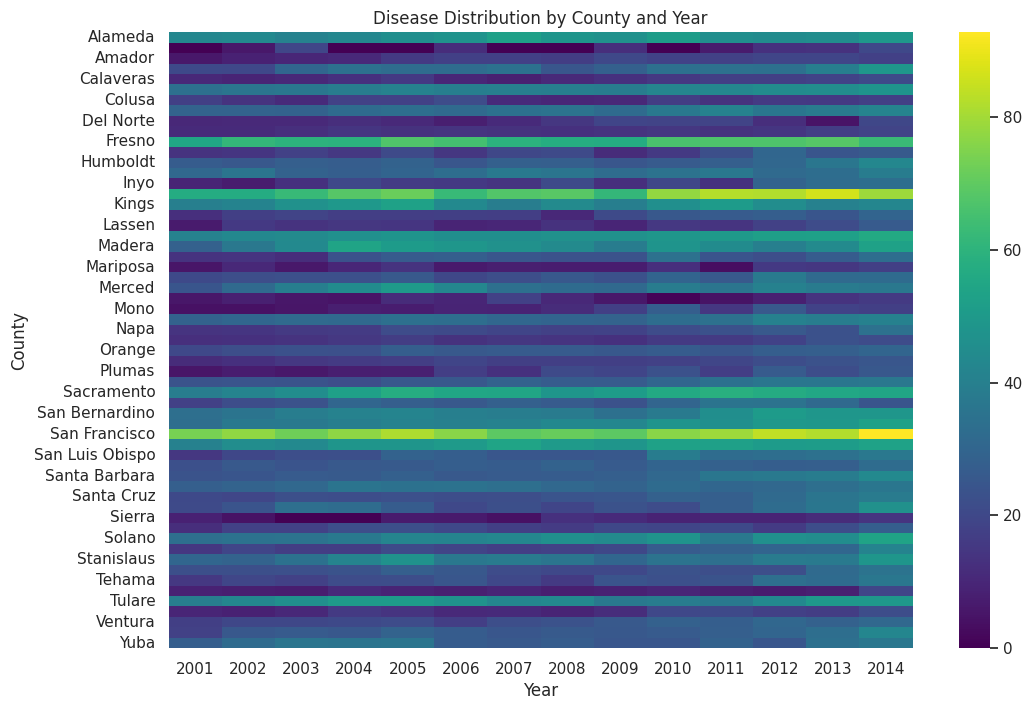

In [21]:
county_year_df = df.groupby(['County', 'Year'])[['Rate']].mean().reset_index()

# Pivot the table to get Rates by Year and County
county_year_pivot = county_year_df.pivot(columns='Year', index='County', values='Rate')

# Heatmap of disease distribution by County and Year
plt.figure(figsize=(12, 8))
sns.heatmap(county_year_pivot, cmap='viridis', annot=False)
plt.title('Disease Distribution by County and Year')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


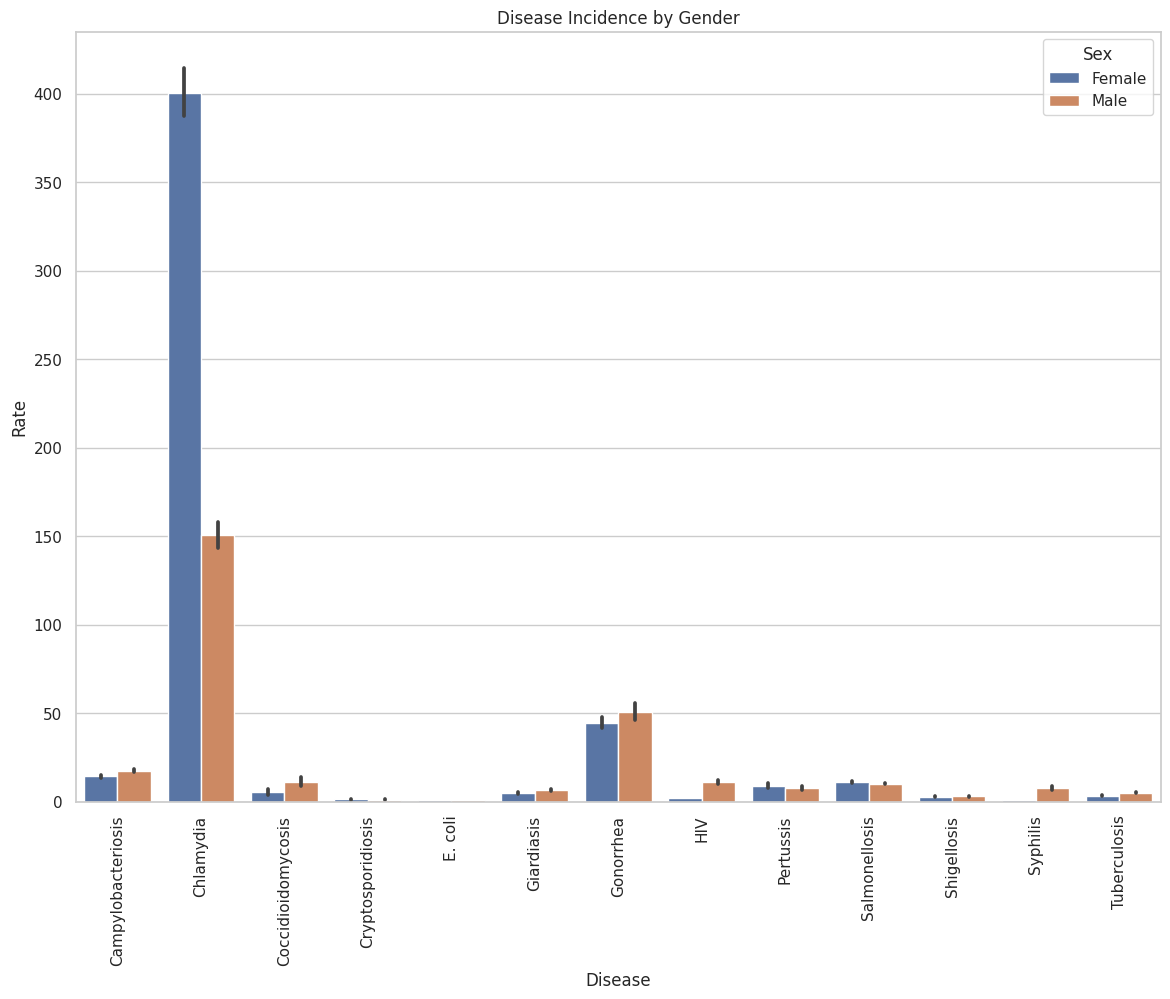

In [22]:
#gender_disease_df = df.groupby(['Disease', 'Sex'])['Rate'].sum().reset_index()

# Bar plot of disease incidence by gender
plt.figure(figsize=(14, 10))
sns.barplot(data=df, x='Disease', y='Rate', hue='Sex')
#plt.yscale("log")
plt.xticks(rotation=90)
plt.title('Disease Incidence by Gender')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_a

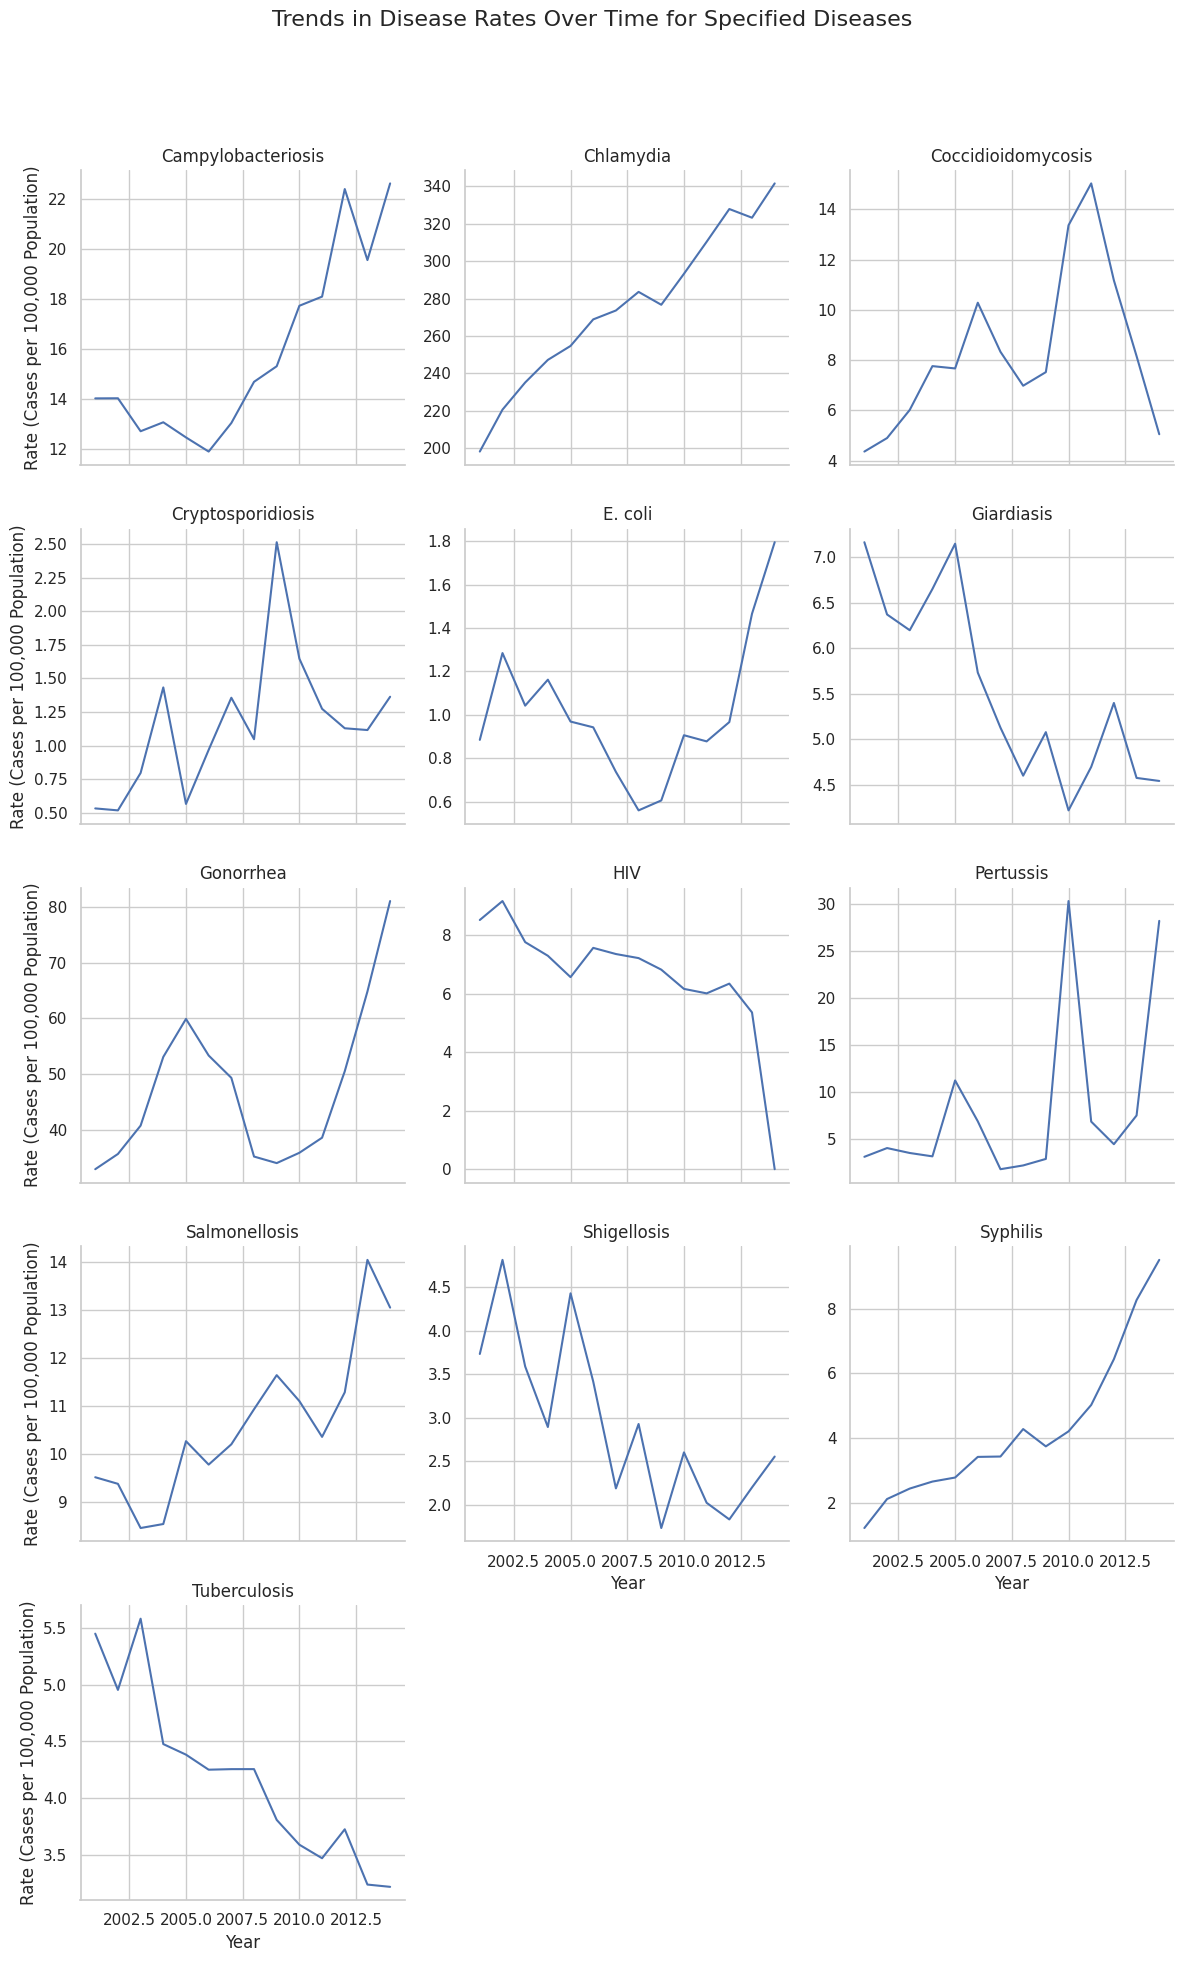

In [23]:
g = sns.FacetGrid(df, col="Disease", col_wrap=3, height=4, sharey=False)

# Map the line plot to each facet
g = g.map(sns.lineplot, "Year", "Rate", ci=None).set_titles("{col_name}")

# Set common axis labels
g.set_axis_labels("Year", "Rate (Cases per 100,000 Population)")

# Adjust the title to be above the plots
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Trends in Disease Rates Over Time for Specified Diseases', fontsize=16)

# Show the plot
plt.show()

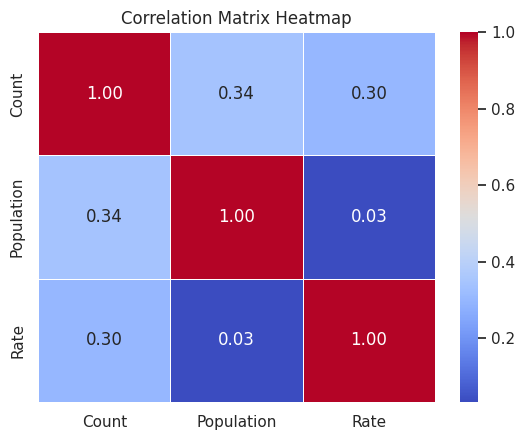

In [24]:
numerical_cols = ["Count", "Population", "Rate"]

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title and labels
plt.title('Correlation Matrix Heatmap')
plt.show()

# Regression Models

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [26]:
categorical_features = ["Disease", "County", "Sex"]
numerical_features = ["Year", "Population", "Rate"]

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(drop='first')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Select target variable
y = df["Count"]
X = df.drop("Count", axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 491.9559
Mean Squared Error (MSE): 10026769.8624
R² Score: 0.1850
